<a href="https://colab.research.google.com/github/luisfelipebp/cancer-SOM/blob/main/mapa_auto_organizavel_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=1cdc86d0ecb9bd64f13207605f8712fef8bd3172eeb86c1982a90c7801a18a0b
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


In [118]:
import minisom
import pandas as pd
import sklearn
import matplotlib
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pylab import pcolor, colorbar, plot
import matplotlib.pyplot as plt

In [11]:
base = pd.read_csv('/content/drive/MyDrive/Data-Science/Redes Neurais/Mapas auto-organizáveis/entradas_breast.csv')
base2 = pd.read_csv('/content/drive/MyDrive/Data-Science/Redes Neurais/Mapas auto-organizáveis/saidas_breast.csv')

In [18]:
df = pd.concat([base,base2], axis=1)

In [19]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,0
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,186.0000,275.0000,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,243.0000,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,173.00000,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.00000,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,205.00000,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,111.00000,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,141.00000,0.21130,0.4107,0.2216,206.0000,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,144.00000,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,159.0000,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,277.00000,0.35140,152.00000,0.2397,0.07016,...,39.42,184.60,1821.0,165.00000,0.86810,0.9387,265.0000,0.4087,124.00000,0


In [23]:
X = df.iloc[:, 0:30].values
y = df.iloc[:, 30].values

In [27]:
normalizador = MinMaxScaler(feature_range=(0,1))
X = normalizador.fit_transform(X)

In [93]:
som = MiniSom(x = 11, y = 11, input_len = 30, sigma = 1.5, learning_rate = 0.5, random_seed=7)

In [94]:
som.random_weights_init(X)

In [95]:
som.train_random(data = X, num_iteration=800)

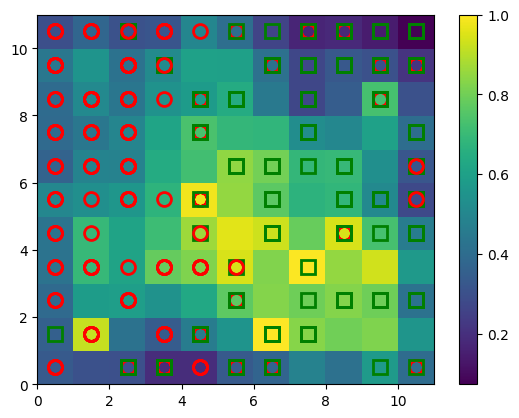

In [97]:
markers = ['o', 's', 'D']
color = ['r', 'g', 'b']

pcolor(som.distance_map().T)
colorbar()

for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markerfacecolor='None',
       markeredgecolor=color[y[i]], markeredgewidth=2, markersize=10)

In [113]:
coord_x, coord_y = 1, 6
pesos_normalizados = som._weights[(coord_x, coord_y)]
pesos_reais = normalizador.inverse_transform(pesos_normalizados.reshape(1, -1))
pesos_reais_maligno = pesos_reais

In [107]:
coord_x, coord_y = 9, 6
pesos_normalizados = som._weights[(coord_x, coord_y)]
pesos_reais = normalizador.inverse_transform(pesos_normalizados.reshape(1, -1))
pesos_reais_benigno = pesos_reais

In [114]:
df_comparativo = pd.DataFrame({
    'Maligno (1,6)': pesos_reais_maligno.flatten(),
    'Benigno (9,6)': pesos_reais_benigno.flatten()
}, index=(df.columns[0:30]))


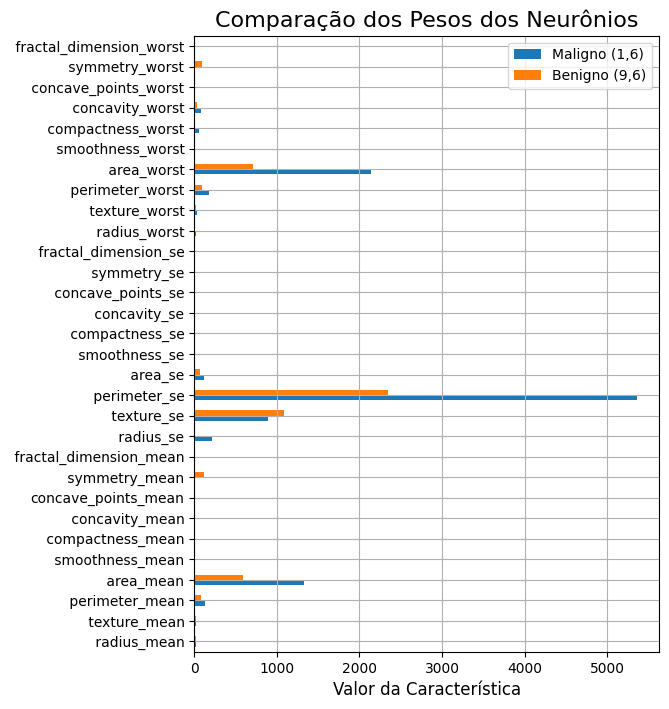

In [119]:
ax = df_comparativo.plot(kind='barh', figsize=(6, 8), grid=True)

ax.set_title('Comparação dos Pesos dos Neurônios', fontsize=16)
ax.set_xlabel('Valor da Característica', fontsize=12)
plt.show()